<a href="https://colab.research.google.com/github/torotoro21/GLAUCOMA-DETECTION/blob/ILHAM/Experiment_Hyperparameters_in_MobileNetV2Glaucoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
from imutils import paths
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from google.colab import drive
import zipfile
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing Dataset

In [ ]:
img_paths = '/content/drive/MyDrive/dataset/Glaukoma.zip'
zip_ref = zipfile.ZipFile(img_paths, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [ ]:
image_paths=paths.list_images("/content/Glaukoma")
gambar = []
label = []

In [ ]:
from sklearn import preprocessing
for images in image_paths:
  image = Image.open(images)
  image = image.convert('RGB')
  image = np.array(image.resize((224,224))) / 255.0

  gambar.append(image)
  labels=images.split(os.path.sep)[-2]
  label.append(labels)

In [ ]:
labels_train_unique = np.unique(np.array(label))

In [ ]:
temp = np.array(gambar)
print(temp.shape)

(1181, 224, 224, 3)


In [ ]:
temp2=np.array(label)
print(temp2.shape)
print(label)

(1181,)
['normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', '

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
label = lb.fit_transform(label)
print(label)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np.array(gambar), np.array(label), test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(944, 224, 224, 3)
(237, 224, 224, 3)
(944, 1)
(237, 1)


# Experiment BatchSize

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import RMSprop                                    

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import plot_model

'''
> weights='imagenet'            bobot diawal diisi langsung dengan bobotnya "cerdas"nya imagenet (pre-trained), jumlah epoch bisa sedikit
> weights=None                  bobot diawal diisi dengan nilai secara acak (random), jika menggunakan ini perbanyak jumlah epoch
> include_top=False             tidak mengikutsertakan fully-connected layer (karena akan didefinisikan secara terpisah dan menyesuaikan
                                dengan dataset yang dipakai), dengan kata lain yang diambil hanya feature extractor layernya saja
> conv_base.trainable=False     hanya diaktifkan jika weights='imagenet', artinya bobot di feature extractor tidak akan diperbarui saat
                                training (freeze), dengan kata lain "proses belajar" hanya akan dilakukan di fully-connected layer yang
                                telah didefinisikan sebelumnya secara terpisah. (feature extractor hanya tinggal dipakai saja)
'''

conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # ⚠️ SESUAIKAN ⚠️
conv_base.trainable = False                                                                                   # ⚠️ SESUAIKAN ⚠️
conv_base.summary()
plot_model(conv_base, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, bs):

    # define model
    model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer = Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=bs, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Batch Size='+str(bs))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
59/59 [==============================] - 12s 50ms/step - loss: 0.6298 - accuracy: 0.6547 - val_loss: 0.6031 - val_accuracy: 0.6667
Epoch 2/50
59/59 [==============================] - 2s 29ms/step - loss: 0.6001 - accuracy: 0.6864 - val_loss: 0.5724 - val_accuracy: 0.7131
Epoch 3/50
59/59 [==============================] - 2s 28ms/step - loss: 0.5745 - accuracy: 0.7129 - val_loss: 0.5497 - val_accuracy: 0.7384
Epoch 4/50
59/59 [==============================] - 2s 33ms/step - loss: 0.5565 - accuracy: 0.7341 - val_loss: 0.5326 - val_accuracy: 0.7511
Epoch 5/50
59/59 [==============================] - 2s 29ms/step - loss: 0.5418 - accuracy: 0.7426 - val_loss: 0.5190 - val_accuracy: 0.7764
Epoch 6/50
59/59 [==============================] - 2s 29ms/step - loss: 0.5282 - accuracy: 0.7606 - val_loss: 0.5049 - val_accuracy: 0.7806
Epoch 7/50
59/59 [==============================] - 2s 29ms/step - loss: 0.5167 - accuracy: 0.7659 - val_loss: 0.4942 - val_accuracy: 0.7848
Epoch 8/50
5

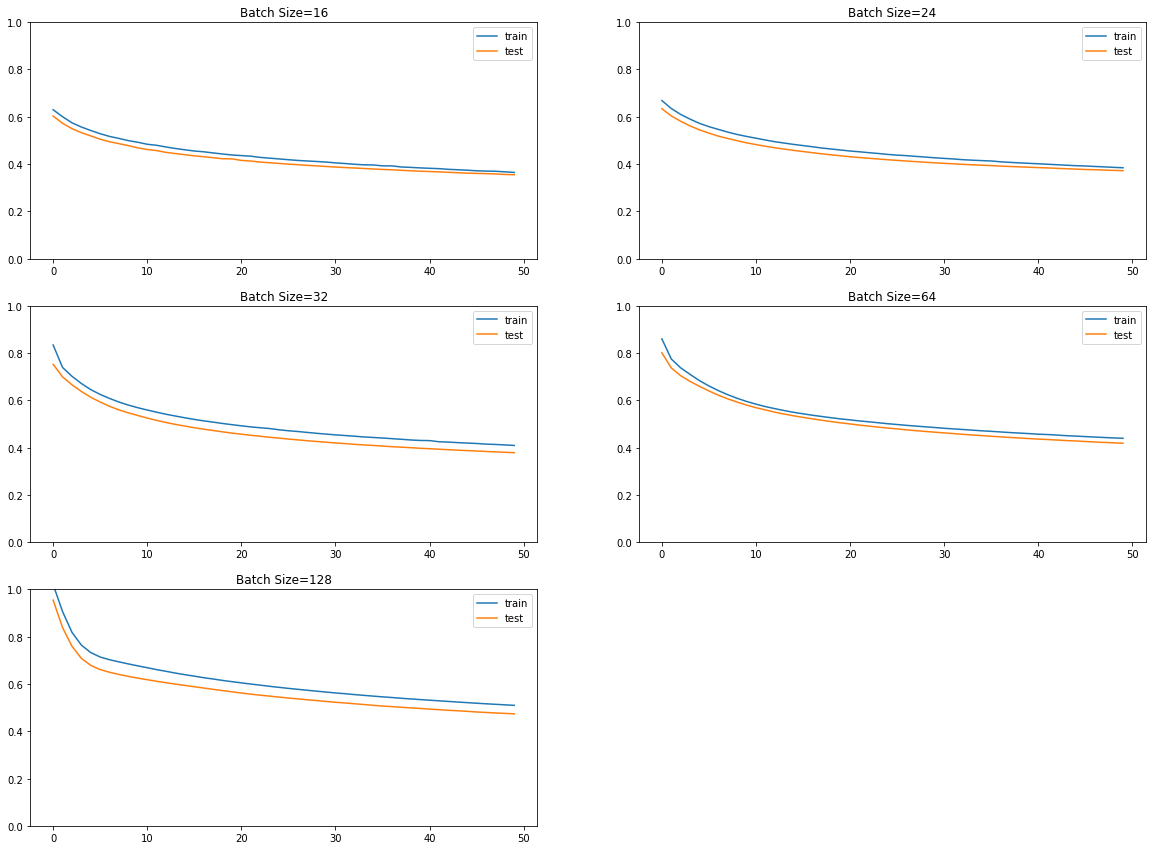

In [ ]:
batch_size = [16, 24, 32, 64, 128]


plt.figure(figsize=(20, 20))
for i in range(len(batch_size)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, batch_size[i])

# show learning curves
plt.show()

# Experiment epoch

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, epoch):

    # define model
    model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer = Adam(learning_rate = 0.0001),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=epoch, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Epoch='+str(epoch))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/40
30/30 [==============================] - 5s 97ms/step - loss: 0.6745 - accuracy: 0.6006 - val_loss: 0.6514 - val_accuracy: 0.6287
Epoch 2/40
30/30 [==============================] - 2s 58ms/step - loss: 0.6350 - accuracy: 0.6356 - val_loss: 0.6282 - val_accuracy: 0.6540
Epoch 3/40
30/30 [==============================] - 2s 57ms/step - loss: 0.6140 - accuracy: 0.6716 - val_loss: 0.6085 - val_accuracy: 0.6962
Epoch 4/40
30/30 [==============================] - 2s 57ms/step - loss: 0.5955 - accuracy: 0.6769 - val_loss: 0.5896 - val_accuracy: 0.7300
Epoch 5/40
30/30 [==============================] - 2s 57ms/step - loss: 0.5807 - accuracy: 0.6917 - val_loss: 0.5736 - val_accuracy: 0.7300
Epoch 6/40
30/30 [==============================] - 2s 57ms/step - loss: 0.5678 - accuracy: 0.7002 - val_loss: 0.5608 - val_accuracy: 0.7553
Epoch 7/40
30/30 [==============================] - 2s 57ms/step - loss: 0.5552 - accuracy: 0.7034 - val_loss: 0.5486 - val_accuracy: 0.7595
Epoch 8/40
30

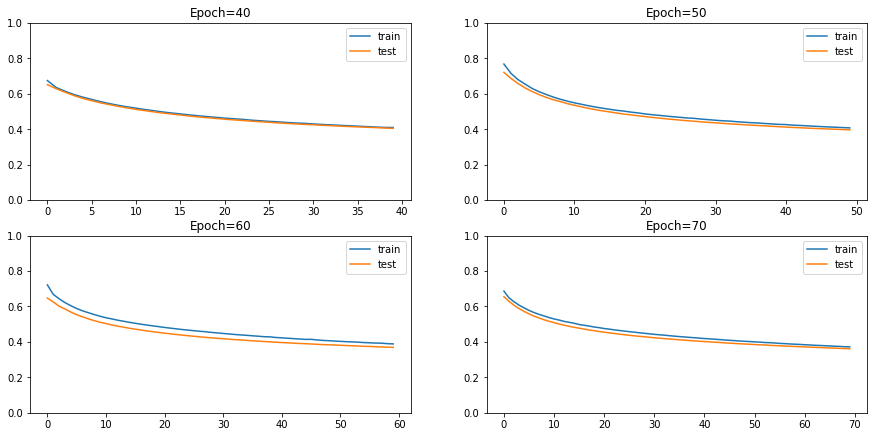

In [ ]:
epoch = [40, 50, 60, 70]


plt.figure(figsize=(15, 15))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, epoch[i])

# show learning curves
plt.show()

# Learning rate

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, lr):

    # define model
    model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer = Adam(learning_rate=lr),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Learning Rate='+str(lr))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
30/30 [==============================] - 5s 96ms/step - loss: 0.6603 - accuracy: 0.6811 - val_loss: 0.3871 - val_accuracy: 0.8270
Epoch 2/50
30/30 [==============================] - 2s 56ms/step - loss: 0.3993 - accuracy: 0.8305 - val_loss: 0.3456 - val_accuracy: 0.8481
Epoch 3/50
30/30 [==============================] - 2s 56ms/step - loss: 0.3688 - accuracy: 0.8369 - val_loss: 0.3654 - val_accuracy: 0.8354
Epoch 4/50
30/30 [==============================] - 2s 56ms/step - loss: 0.3258 - accuracy: 0.8655 - val_loss: 0.2938 - val_accuracy: 0.8819
Epoch 5/50
30/30 [==============================] - 2s 55ms/step - loss: 0.2780 - accuracy: 0.8782 - val_loss: 0.3164 - val_accuracy: 0.8565
Epoch 6/50
30/30 [==============================] - 2s 56ms/step - loss: 0.2656 - accuracy: 0.8941 - val_loss: 0.2778 - val_accuracy: 0.8776
Epoch 7/50
30/30 [==============================] - 2s 56ms/step - loss: 0.2785 - accuracy: 0.8845 - val_loss: 0.2685 - val_accuracy: 0.8945
Epoch 8/50
30

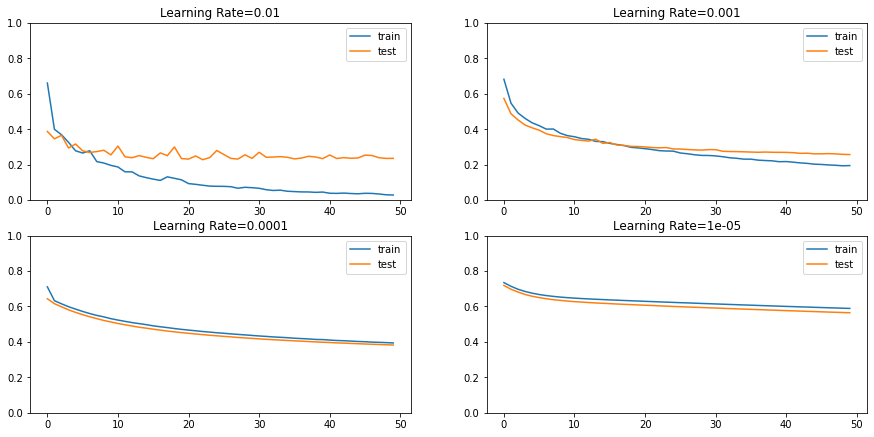

In [ ]:
lr = [0.01, 0.001, 0.0001, 0.00001]


plt.figure(figsize=(15, 15))
for i in range(len(lr)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, lr[i])

# show learning curves
plt.show()

# Optimizer

In [ ]:
def fit_second_model(x_train, y_train, x_test, y_test, opt):

    # define model
    model = tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer = opt,
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # fit model
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Optimizer='+str(opt))
    plt.ylim([0, 1])
    plt.legend()

Epoch 1/50
30/30 [==============================] - 5s 95ms/step - loss: 0.6966 - accuracy: 0.5742 - val_loss: 0.6591 - val_accuracy: 0.6498
Epoch 2/50
30/30 [==============================] - 2s 56ms/step - loss: 0.6626 - accuracy: 0.6419 - val_loss: 0.6325 - val_accuracy: 0.6751
Epoch 3/50
30/30 [==============================] - 2s 67ms/step - loss: 0.6384 - accuracy: 0.6653 - val_loss: 0.6102 - val_accuracy: 0.6920
Epoch 4/50
30/30 [==============================] - 2s 56ms/step - loss: 0.6183 - accuracy: 0.6939 - val_loss: 0.5894 - val_accuracy: 0.6878
Epoch 5/50
30/30 [==============================] - 2s 56ms/step - loss: 0.6012 - accuracy: 0.7055 - val_loss: 0.5742 - val_accuracy: 0.7257
Epoch 6/50
30/30 [==============================] - 2s 56ms/step - loss: 0.5858 - accuracy: 0.7119 - val_loss: 0.5589 - val_accuracy: 0.7215
Epoch 7/50
30/30 [==============================] - 2s 56ms/step - loss: 0.5728 - accuracy: 0.7203 - val_loss: 0.5456 - val_accuracy: 0.7511
Epoch 8/50
30

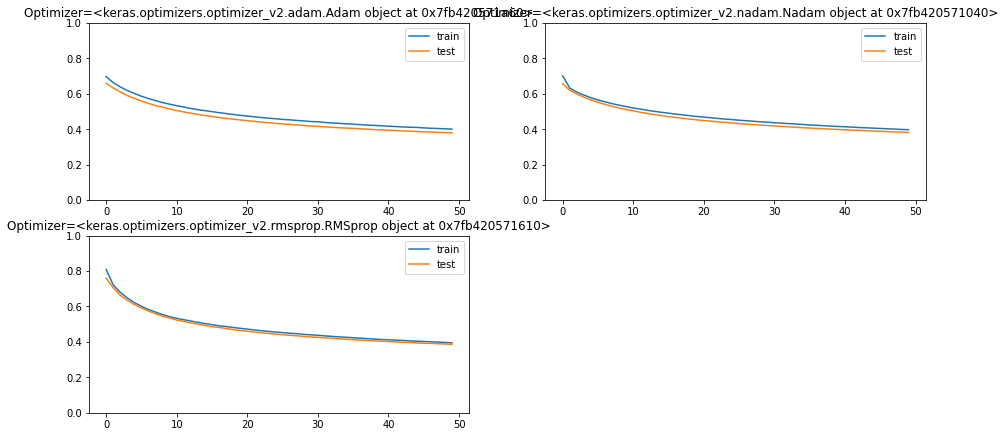

In [ ]:
opt = [Adam(learning_rate=0.0001), Nadam(learning_rate=0.0001), RMSprop(learning_rate=0.0001)]


plt.figure(figsize=(15, 15))
for i in range(len(opt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_second_model(X_train, Y_train, X_test, Y_test, opt[i])

# show learning curves
plt.show()

# Traing K-Fold

In [ ]:
path_save = '/content/'

In [ ]:
%%time

import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

def evaluate_model(dataX, dataY, n_folds=5):  # ⚠️ SESUAIKAN ⚠️ (Hanya Data Train yang digunakan, nanti dipecah jadi Train & Validasi oleh library)

    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1) # ⚠️ SESUAIKAN ⚠️ (1 sebagai seed/index shuffle, agar saat run ulang nanti hasil shuffle sama)

    i = 0
    # enumerate splits
    for train_ix, val_ix in kfold.split(dataX):
        i = i+1
        # define model
        model = define_model_mobilenetv2()    # ⚠️ SESUAIKAN ⚠️
        # model = define_model_kustom()    # ⚠️ SESUAIKAN ⚠️
        # select rows for train and test
        trainX, trainY, valX, valY = dataX[train_ix], dataY[train_ix], dataX[val_ix], dataY[val_ix]
        # fit model
        history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=1)
        # evaluate model
        loss, acc = model.evaluate(valX, valY, verbose=0)
        print('\nAkurasi Fold ke-' + str(i) + ' = %.3f' % (acc * 100.0))
        print('Loss Fold ke-' + str(i) + ' = %.3f' % (loss) + '\n')
        # append scores
        scores.append(acc)
        histories.append(history)

        #----------------------------- Additional -----------------------------#

        # 01 - Save model as h5
        model.save(path_save+"/model_fold_" + str(i) + ".h5")            # ⚠️ SESUAIKAN ⚠️    

        # 02 - Save model report to csv
        model_csv = pd.DataFrame(history.history)
        csv_file = path_save+"/model_fold_" + str(i) + ".csv"           # ⚠️ SESUAIKAN ⚠️
        with open(csv_file, mode="w") as f:
          model_csv.to_csv(f)
        
        # 03 - Clean the RAM for every Fold
        #del trainX
        #del trainY
        #del valX
        #del valY
        #del model
        #gc.collect()

        #----------------------------------------------------------------------#

    return scores, histories
    
scores, histories = evaluate_model(X_train, Y_train)

Epoch 1/100
30/30 [==============================] - 13s 109ms/step - loss: 0.6702 - accuracy: 0.6049 - val_loss: 0.6504 - val_accuracy: 0.6034
Epoch 2/100
30/30 [==============================] - 2s 55ms/step - loss: 0.6389 - accuracy: 0.6261 - val_loss: 0.6175 - val_accuracy: 0.6371
Epoch 3/100
30/30 [==============================] - 2s 56ms/step - loss: 0.6151 - accuracy: 0.6600 - val_loss: 0.5915 - val_accuracy: 0.6835
Epoch 4/100
30/30 [==============================] - 2s 56ms/step - loss: 0.5949 - accuracy: 0.6886 - val_loss: 0.5691 - val_accuracy: 0.7089
Epoch 5/100
30/30 [==============================] - 2s 56ms/step - loss: 0.5794 - accuracy: 0.7013 - val_loss: 0.5512 - val_accuracy: 0.7173
Epoch 6/100
30/30 [==============================] - 2s 56ms/step - loss: 0.5640 - accuracy: 0.7193 - val_loss: 0.5359 - val_accuracy: 0.7342
Epoch 7/100
30/30 [==============================] - 2s 56ms/step - loss: 0.5526 - accuracy: 0.7278 - val_loss: 0.5207 - val_accuracy: 0.7595
Epoc

In [ ]:
os.chdir(path_save)

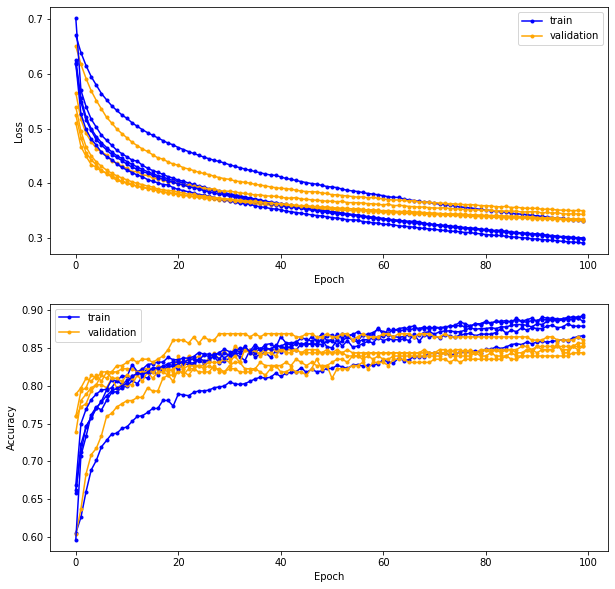

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_combine(histories):
    plt.figure(figsize=(10,10))
    
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211) # 2 baris, 1 kolom, index ke-1
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')
        
        # plot accuracy
        plt.subplot(212) # 2 baris, 1 kolom, index ke-2
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='bottom right')
    plt.show()
summarize_diagnostics_combine(histories)

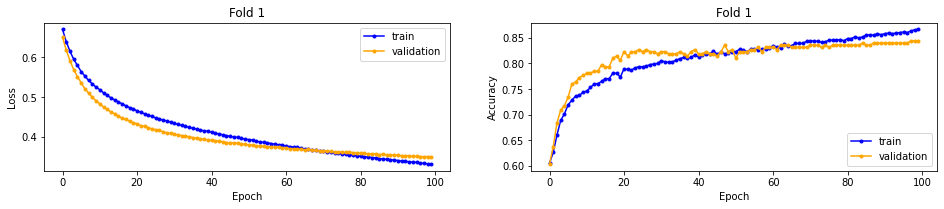

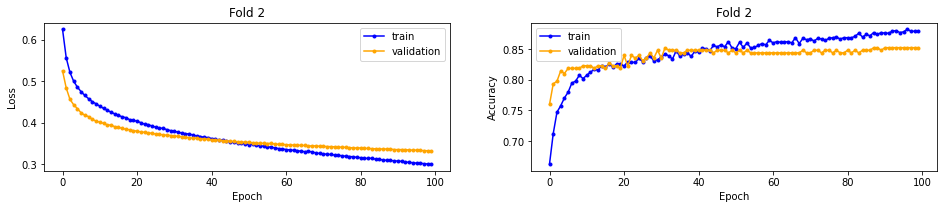

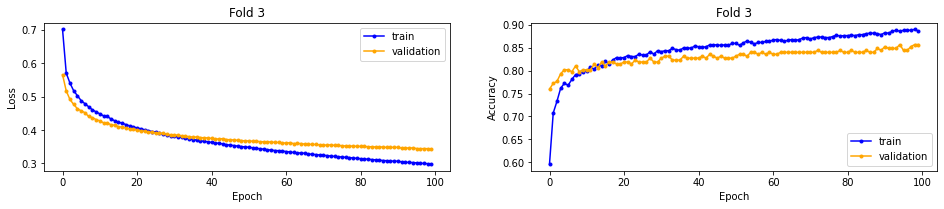

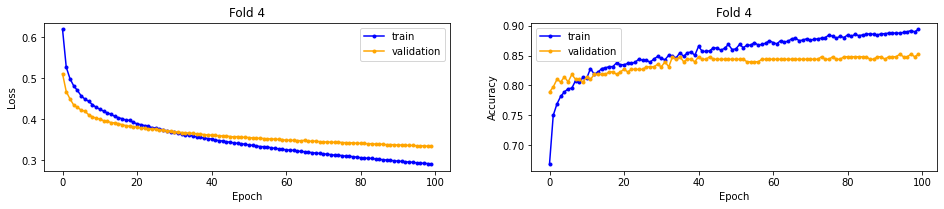

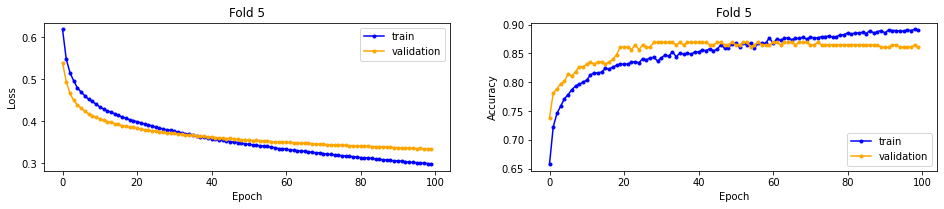

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def summarize_diagnostics_single(histories):
    for i in range(len(histories)):
        plt.figure(figsize=(16,6))

        # plot loss
        plt.subplot(221) # 2 baris, 2 kolom, index ke-1
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='upper right')
        plt.savefig(f"Loss_fold {i+1}.png")

        # plot accuracy
        plt.subplot(222) # 2 baris, 2 kolom, index ke-2
        plt.title('Fold ' + str(i+1))
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', marker='.', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', marker='.', label='test')
        plt.legend(['train', 'validation'], loc='bottom right')
        plt.savefig(f"Acc_fold {i+1}.png")
        plt.show()

summarize_diagnostics_single(histories)

Accuracy: mean=87.926 std=2.141, n=5


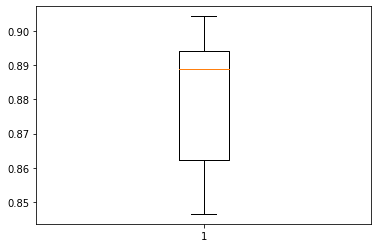

In [ ]:
from numpy import mean
from numpy import std

def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.savefig("Mean_Std.png")
    plt.show()

# summarize estimated performance
summarize_performance(scores)

# Training tanpa K-Fold

In [ ]:
os.mkdir("/content/simpan_model2_tanpa")

In [ ]:
%%time

import pandas as pd

epochs = 10       # ⚠️ SESUAIKAN ⚠️
batch_size = 64   # ⚠️ SESUAIKAN ⚠️

model = define_model_mobilenetv2() 

#=======================================================================================================================================#
# CARA 1 : validation_split=0.2 ➜ artinya langsung memecah data train ➜ jadi 80% train & 20% validation ➜ memakan banyak sekali RAM
#          hal ini berarti pula bahwa penggunaan K-Fold itu memberatkan komputasi, coba saja sendiri, terlebih jika data berupa image
#          dan jumlah data hingga ribuan, hal ini akan memakan bayak sekali RAM, bahkan bisa hingga terjadi Out of Memory (OOM). Dan
#          karena alasan ini pula banyak sekali tutorial Image Classification dengan CNN yang tersebar di internet, tidak memakai
#          K-Fold. sebenarnya penggunaan K-Fold itu diperuntukan untuk Machine Learning, bukan Deep Learning, karena alasan komputasi.
#          sebagai alternatif solusinya yaitu gunakan saja pre-trained model terkenal, maka K-Fold tidak terlalu dibutuhkan, bahkan
#          jumlah epoch pun tidak harus banyak. dengan pre-trained model terkenal, meskipun dataset yang digunakan sedikit (misal
#          dibawah 1000), tetap berpotensi besar menghasilkan model yang optimal untuk kasus dataset yang digunakan. dan jika pada
#          saat testing menghasilkan akurasi yang baik, maka hal ini sudah membuktikan bahwa penggunaan K-Fold tidak terlalu dibutuhkan.
#=======================================================================================================================================#
#history = model.fit(X_train_norm, y_train_encode, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

#=======================================================================================================================================#
# CARA 2 : validation_data=(X_test_norm, y_test_encode) ➜ artinya gunakan data validasi dari luar/bukan dari data train yang dipecah
#          ➜ minim penggunaan RAM. CARA 2 ini sebagai alternatif solusi yang baik jika ingin training dengan validasi sekaligus.
#=======================================================================================================================================#
#history = model.fit(X_train_norm, y_train_encode, validation_data=(X_test_norm, y_test_encode), epochs=20, batch_size=32, verbose=1)

#=======================================================================================================================================#
# CARA 3 : TANPA VALIDATION DATA. jika menggunakan CARA 2, malah menghasilkan lebih banyak salah prediksi saat testing data dari internet.
#          hal ini kemungkinan besar akibat terlalu serupanya data train dengan data validasi. Oleh karena itu, dalam kasus ini, karena
#          memang dataset yang sebenarnya hanya sedikit (banyak akibat di augmetasi saja), maka yang dilakukan hanyalah training dan
#          testing saja, tanpa melalui tahapan validasi. namun disamping itu, model yang dihasilkan sudah cukup baik. buktikan saja.
#=======================================================================================================================================#
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/10
15/15 [==============================] - 5s 114ms/step - loss: 0.6191 - accuracy: 0.6695
Epoch 2/10
15/15 [==============================] - 1s 82ms/step - loss: 0.5522 - accuracy: 0.7299
Epoch 3/10
15/15 [==============================] - 1s 81ms/step - loss: 0.5189 - accuracy: 0.7564
Epoch 4/10
15/15 [==============================] - 1s 82ms/step - loss: 0.4958 - accuracy: 0.7638
Epoch 5/10
15/15 [==============================] - 1s 82ms/step - loss: 0.4803 - accuracy: 0.7744
Epoch 6/10
15/15 [==============================] - 1s 81ms/step - loss: 0.4693 - accuracy: 0.7775
Epoch 7/10
15/15 [==============================] - 1s 82ms/step - loss: 0.4601 - accuracy: 0.7913
Epoch 8/10
15/15 [==============================] - 1s 82ms/step - loss: 0.4531 - accuracy: 0.7913
Epoch 9/10
15/15 [==============================] - 1s 82ms/step - loss: 0.4453 - accuracy: 0.8008
Epoch 10/10
15/15 [==============================] - 1s 82ms/step - loss: 0.4394 - accuracy: 0.8008
CPU time

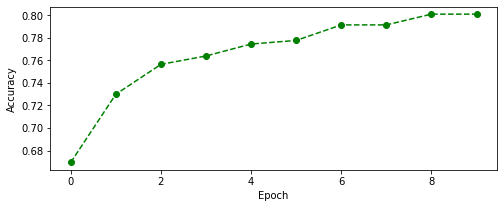

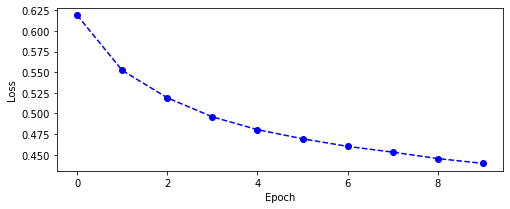

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['accuracy'], 'og', linestyle='dashed')
#ax.plot(history.history['val_accuracy'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='lower right')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['loss'], 'ob', linestyle='dashed')
#ax.plot(history.history['val_loss'])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='upper right')
plt.show()

# Testing

In [ ]:
# Bersihkan model sebelumnya (RAM cleaner)
#if "model" in globals():
  #del model
  #gc.collect()

# Load model
from tensorflow.keras.models import load_model
# Masukkan path model yang dipilih
model = load_model( path_save+'/model_fold_1.h5') # ⚠️ SESUAIKAN ⚠️
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
from sklearn.preprocessing import LabelBinarizer

# RAM cleaner
#if "encoder" in globals():
  #del encoder
  #del y_train_encode_new
  #del y_test_encode_new
  #del pred
  #del prediksi
  #del pred_label
  #del true_label
  #gc.collect()

# Encoding Labels (y) dengan cara yang berbeda, untuk keperluan confusion matrix
encoder             = LabelBinarizer()
y_train_encode_new  = encoder.fit_transform(Y_train)
y_test_encode_new   = encoder.fit_transform(Y_test)

# ============================================================================ #
# =============================== DATA TESTING =============================== #
# ============================================================================ #

pred        = model.predict(X_test.astype('float32'), verbose=0)
prediksi    = np.argmax(pred, axis=-1) # coba -> predict.shape -> (800, 5) -> maka axis=-1 itu akan ngambil nilai 5 tersebut (yaitu kategori/labelnya)

'''
Please use instead:
* np.argmax(model.predict(x), axis=-1)      if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).
* (model.predict(x) > 0.5).astype("int32")  if your model does binary classification (e.g. if it uses a `sigmoid` last-layer activation).
'''

pred_label  = model.predict(X_test, batch_size=64, verbose=0)  # label hasil prediksi
true_label  = np.argmax(y_test_encode_new, axis=-1)                         # label yang sebenarnya

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test, y_test_encode_new, verbose=1)

Label Prediksi   : [[0.81687313]
 [0.9776278 ]
 [0.02273726]
 [0.90032   ]
 [0.7676073 ]
 [0.9555489 ]
 [0.8180502 ]
 [0.8358942 ]
 [0.9365068 ]
 [0.84706366]
 [0.9472833 ]
 [0.00553144]
 [0.02045886]
 [0.71328133]
 [0.16306072]
 [0.77636266]
 [0.86267245]
 [0.434786  ]
 [0.8238247 ]
 [0.0244934 ]
 [0.9816253 ]
 [0.39687714]
 [0.8932651 ]
 [0.03715437]
 [0.07503862]
 [0.8668748 ]
 [0.5993001 ]
 [0.73282605]
 [0.63028985]
 [0.12920827]
 [0.94271255]
 [0.41894025]
 [0.6927706 ]
 [0.9404909 ]
 [0.9775539 ]
 [0.1702442 ]
 [0.42061788]
 [0.94915324]
 [0.9547936 ]
 [0.08180297]
 [0.9642599 ]
 [0.28888276]
 [0.5709205 ]
 [0.9559664 ]
 [0.05505545]
 [0.9724186 ]
 [0.96412927]
 [0.73156893]
 [0.87296355]
 [0.2735907 ]
 [0.16785102]
 [0.2669607 ]
 [0.15868965]
 [0.8806137 ]
 [0.94776344]
 [0.6514081 ]
 [0.06758588]
 [0.8926082 ]
 [0.9416896 ]
 [0.9057004 ]
 [0.9267391 ]
 [0.11050431]
 [0.44907838]
 [0.9335673 ]
 [0.34236696]
 [0.8595214 ]
 [0.06112119]
 [0.9664039 ]
 [0.89379513]
 [0.9638755 ]
 

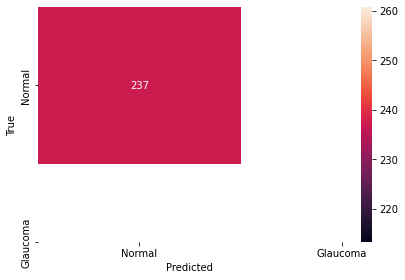

In [ ]:
import sklearn.metrics as metrics
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(Y_test.argmax(axis=1),pred.argmax(axis=1))
x_axis_labels = ['Normal','Glaucoma']
y_axis_labels = ['Normal','Glaucoma']
sn.heatmap(confusion_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("Confuison_matrix.jpg")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
class_labels = ['Bowlegs','Knock Knees', 'Normal Knee']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encode_new[:,i], pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_encode_new.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

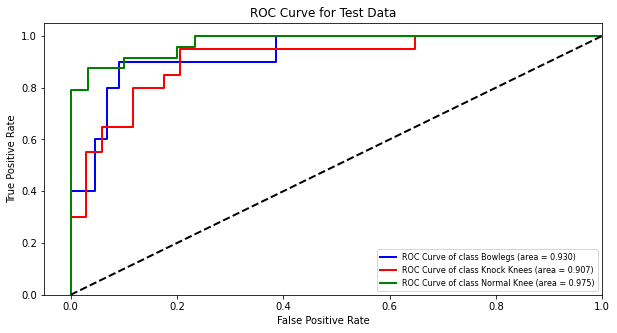

In [ ]:
colors = cycle(['blue', 'red', 'green', 'brown', 'purple'])
plt.figure(figsize=(10,5))
for i, color, lbl in zip(range(n_classes), colors, class_labels):
  plt.plot(fpr[i], tpr[i], color = color, lw = 2, label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.legend(loc = 'lower right', prop = {'size': 8})
plt.savefig("Roc_curve1.jpg")
plt.show()